In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
 57% 802M/1.36G [00:13<00:06, 102MB/s]

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/indonesian-sign-language-bisindo.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
%cd bisindo

/content/bisindo


In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
img_width= 224
img_height=224

In [ ]:
data_train_path = 'images/train'
data_val_path = 'images/val'

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 9169 files belonging to 26 classes.


In [ ]:
cat_data = data_train.class_names

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 2301 files belonging to 26 classes.


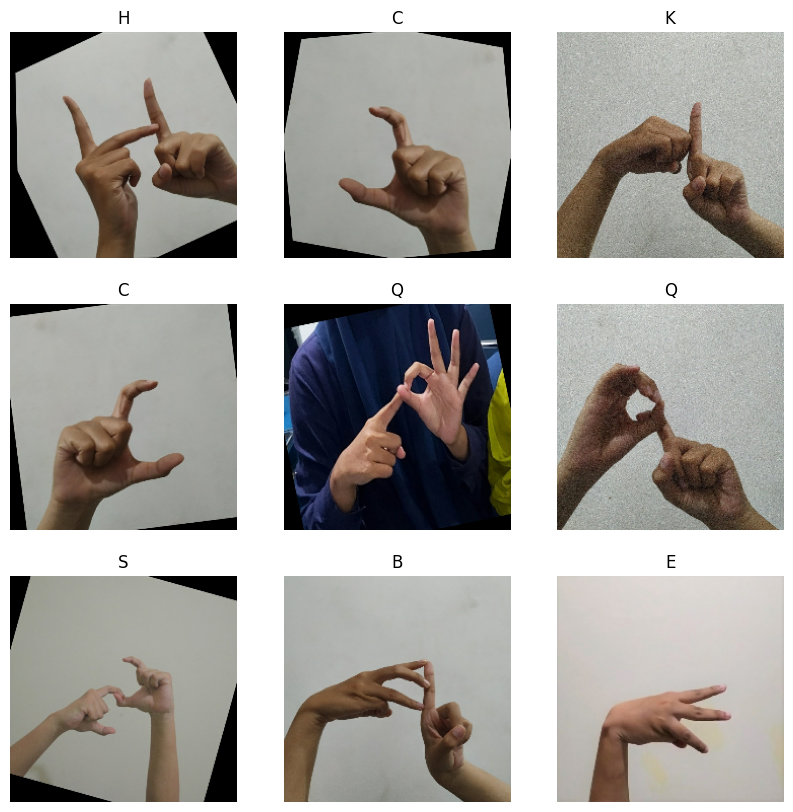

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(cat_data[labels[i]])
    plt.axis('off')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,  activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len (cat_data))
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),
    metrics=['accuracy'])

In [ ]:
epochs=5
history=model.fit(data_train, validation_data=data_val, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/5
287/287 [==============================] - 519s 2s/step - loss: 1.2734 - accuracy: 0.6772 - val_loss: 0.7416 - val_accuracy: 0.7962
Epoch 2/5
287/287 [==============================] - 500s 2s/step - loss: 0.3953 - accuracy: 0.8867 - val_loss: 0.6637 - val_accuracy: 0.8292
Epoch 3/5
287/287 [==============================] - 506s 2s/step - loss: 0.1150 - accuracy: 0.9671 - val_loss: 0.9003 - val_accuracy: 0.8288
Epoch 4/5


KeyboardInterrupt: 